# **Introdução e Análise de Dados: Trabalho 1**

# **COVID-19 - Análise Exploratória de Dados**

Apesar do dataset conter dados de vários municípios do Rio Grande do Sul, o presente trabalho irá focar na análise em relação ao município de Alegrete. 

# **Obtenção dos Dados**

O conjunto de dados utilizado neste trabalho está hospedado na plataforma openDataSUS. Se trata de um dataset composto por dados sobre os casos do COVID-19 registrados a partir de março de 2020.

O conjunto de dados completo está disponível no seguinte link:


> https://opendatasus.saude.gov.br/dataset/casos-nacionais




É possível acessar o dicionário de dados através do seguinte link:


> https://opendatasus.saude.gov.br/dataset/140cf8b0-cade-43d8-b358-30d472c50fad/resource/0c0d4c0b-4000-4bc8-86f3-5ff286b468a2/download/dicionario-de-dados_e-sus-notifica-opendatasus-1.pdf



# **Carregamento de Dados**

Importação das bibliotecas:

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    import pandas as pd
import numpy as np
from numpy import nan as NA

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [ ]:
df_dadosrs1 = pd.read_csv('https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-rs-1.csv' , sep=';', engine='python', encoding='latin-1')
df_dadosrs2 = pd.read_csv('https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-rs-2.csv', sep=';', engine='python', encoding='latin-1')

Concatenação dos dois DataFrames (df_dadosrs1 e df_dadosrs2) em apenas um DataFrame

In [ ]:
df_dadosrs= pd.concat([df_dadosrs1, df_dadosrs2], sort = False)
#df_dadosrs

# **Limpeza dos Dados**

**Verificação das colunas por tipos de dados**

In [ ]:
df_dadosrs.dtypes

ÿid                         object
dataNotificacao             object
dataInicioSintomas          object
dataNascimento              object
sintomas                    object
profissionalSaude           object
cbo                         object
condicoes                   object
estadoTeste                 object
dataTeste                   object
tipoTeste                   object
resultadoTeste              object
paisOrigem                  object
sexo                        object
estado                      object
estadoIBGE                  object
municipio                   object
municipioIBGE               object
origem                      object
cnes                        object
estadoNotificacao           object
estadoNotificacaoIBGE       object
municipioNotificacao        object
municipioNotificacaoIBGE    object
excluido                    object
validado                    object
idade                       object
dataEncerramento            object
evolucaoCaso        

**Removendo colunas do DataFrame**

Nesse caso, informações como `ÿid, paisOrigem, estado, estadoIBGE, municipioIBGE, origem, cnes, estadoNotificacao, estadoNotificacaoIBGE, excluido, validado`, `datanascimento` e `dataencerramento` não são importantes e manter esses dados seria um gasto de processamento e memória desnecessário.






In [ ]:
df_dadosrs.drop('ÿid', inplace=True, axis=1)
df_dadosrs.drop('paisOrigem', inplace=True, axis=1)
df_dadosrs.drop('estado', inplace=True, axis=1)
df_dadosrs.drop('estadoIBGE', inplace=True, axis=1)
df_dadosrs.drop('municipioIBGE', inplace=True, axis=1)
df_dadosrs.drop('origem', inplace=True, axis=1)
df_dadosrs.drop('cnes', inplace=True, axis=1)
df_dadosrs.drop('estadoNotificacao', inplace=True, axis=1)
df_dadosrs.drop('estadoNotificacaoIBGE', inplace=True, axis=1)
df_dadosrs.drop('excluido', inplace=True, axis=1)
df_dadosrs.drop('validado', inplace=True, axis=1)
df_dadosrs.drop('dataNascimento', inplace=True, axis=1)
df_dadosrs.drop('dataEncerramento', inplace=True, axis=1)

**Detectar valores ausentes para coluna do DataFrame**

In [ ]:
df_dadosrs.isnull().sum()

dataNotificacao                 379
dataInicioSintomas                0
sintomas                       1657
profissionalSaude              2424
cbo                         1630212
condicoes                   1634081
estadoTeste                   96994
dataTeste                    243391
tipoTeste                    244611
resultadoTeste               371722
sexo                              3
municipio                        20
municipioNotificacao           2815
municipioNotificacaoIBGE          0
idade                             0
evolucaoCaso                1271836
classificacaoFinal          1131492
dtype: int64

**Conversão de alguns campos do DataFrame**

As colunas `dataNotificacao`, `dataInicioSintomas`, são do tipo object, então é necessário passar para o tipo to_datetime. 

Para este caso, optou-se dividir a string apartir do 'T'. Em sequência,  realizar a conversão dos campos object para o tipo to_datetime

Também é necessário realizar a conversão do campo `idade` de object para numeric.

In [ ]:
df_dadosrs['dataNotificacao'] = df_dadosrs['dataNotificacao'].apply(lambda x: str(x).title().split('T')[0])
df_dadosrs['dataInicioSintomas'] = df_dadosrs['dataInicioSintomas'].apply(lambda x: str(x).title().split('T')[0])

df_dadosrs['dataNotificacao']= pd.to_datetime(df_dadosrs['dataNotificacao'],dayfirst=True, errors='coerce')
df_dadosrs['dataInicioSintomas'] = pd.to_datetime(df_dadosrs['dataInicioSintomas'],dayfirst=True, errors='coerce')

df_dadosrs.cbo = df_dadosrs.cbo.str.replace('3222 - TÉCNICO OU AUXILIAR EM ENFERMAGEM','3222 - TÉCNICOS E AUXILIARES DE ENFERMAGEM')
#df_dadosrs.cbo = df_dadosrs.cbo.str.replace('3222 - TÉCNICOS E AUXILIAR EM ENFERMAGEM','3222 - TÉCNICOS E AUXILIARES EM ENFERMAGEM')

df_dadosrs["idade"] = pd.to_numeric(df_dadosrs["idade"], errors='coerce')
#df_dadosrs.resultadoTeste = df_dadosrs.resultadoTeste.astype('category')

# **Análise de Dados - Todos Municípios do Rio Grande do Sul**




Após a concatenação dos DataFrames, o novo dataset é formado por **1.812.847 linhas** e **17 variáveis**.

Antes de iniciar as análises sobre os dados de Alegrete, é interessante ter uma visão do comportamento dos dados no restante do estado.

É possível verificar quais municípios apresentam os maiores números de casos confirmados de covid-19 em todo o estado do Rio Grande do Sul no ano de 2020.

<BarContainer object of 20 artists>

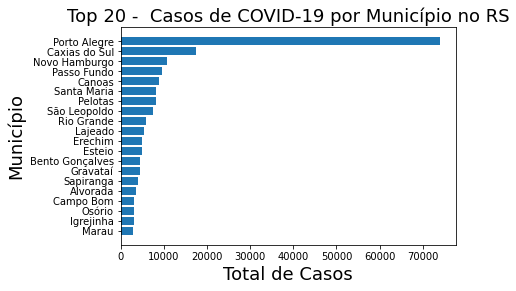

In [ ]:
condicoes = df_dadosrs[(df_dadosrs.resultadoTeste == 'Positivo')].municipioNotificacao.value_counts().head(20)
condicoes.sort_values(ascending = True, inplace = True)

plt.title('Top 20 -  Casos de COVID-19 por Município no RS', fontsize=18,)
plt.xlabel('Total de Casos', fontsize=18)
plt.ylabel('Município', fontsize=18)
plt.barh(condicoes.index, condicoes.values, align='center')



---





> O número mais impressionante é da cidade de **Porto Alegre** com mais de **70 mil casos** confirmados , que apresenta, pelo menos, três vezes mais casos do que o restante dos municípios listados.



# **Análise de Dados - Alegrete**




Como o objetivo deste trabalho é analisar os dados do município de Alegrete. Então vamos criar um dataframe somente com esses dados.

A biblioteca pandas proporciona o agrupamento de dados por valores das colunas, esta operação possibilita filtrar dados individuais por nome do Município.
Cria-se   o   grupo   de   valores   (objeto   tipo   ‘DataFrameGroupBy’) chamando   a   função   ‘.groupby()’,  armazenando-a  na  variável  ‘df_agrupado’ e  passando  a  coluna  ‘municipio’  como parâmetro.


> O novo dataset apenas com os **dados de Alegrete** possui **8347 linhas** e **19 colunas**.



In [ ]:
df_agrupado = df_dadosrs.groupby(['municipioNotificacao'])
df_alegrete = df_agrupado.get_group('Alegrete')
df_alegrete

,dataNotificacao,dataInicioSintomas,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,sexo,municipio,municipioNotificacao,municipioNotificacaoIBGE,idade,evolucaoCaso,classificacaoFinal
1316,2020-07-22,2020-07-18,Febre,Não,NaN,NaN,Concluído,2020-07-28T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,Feminino,Alegrete,Alegrete,4300406,3.0,Cancelado,Confirmado Laboratorial
3705,2020-07-22,2020-07-09,"Febre, Tosse, Outros",Não,NaN,NaN,Concluído,2020-07-21T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,Feminino,Alegrete,Alegrete,4300406,2.0,Cura,Confirmado Laboratorial
3853,2020-07-22,2020-07-21,"Tosse, Outros",Não,NaN,NaN,Concluído,2020-07-31T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,Masculino,Alegrete,Alegrete,4300406,84.0,Cura,Confirmado Laboratorial
4494,2020-07-17,2020-07-17,Outros,Não,NaN,NaN,Concluído,2020-07-17T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,Feminino,Alegrete,Alegrete,4300406,32.0,Cura,NaN
6863,2020-08-03,2020-08-03,Outros,Não,NaN,NaN,Concluído,2020-08-03T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,Masculino,Alegrete,Alegrete,4300406,31.0,Cura,Confirmado Laboratorial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810013,2020-11-16,2020-11-13,"Febre, Dor de Cabeça, Tosse, Dor de Garganta",Não,NaN,Doenças cardíacas crônicas,Concluído,2020-11-16T03:00:00.000Z,TESTE RÁPIDO - ANTÍGENO,Positivo,Masculino,Alegrete,Alegrete,4300406,62.0,Cura,Confirmado Laboratorial
810793,2020-11-11,2020-11-10,"Dor de Garganta, Tosse, Coriza",Não,NaN,NaN,Concluído,2020-11-16T03:00:00.000Z,RT-PCR,Positivo,Feminino,Alegrete,Alegrete,4300406,62.0,Cura,Confirmado Laboratorial
810974,2020-11-11,2020-11-10,"Dor de Garganta, Tosse, Febre, Outros",Não,NaN,NaN,Concluído,2020-11-17T03:00:00.000Z,RT-PCR,Positivo,Feminino,Alegrete,Alegrete,4300406,30.0,Cura,Confirmado Laboratorial
811064,2020-11-11,2020-11-10,"Dor de Garganta, Tosse, Outros",Não,NaN,NaN,Concluído,2020-11-13T03:00:00.000Z,RT-PCR,Positivo,Masculino,Alegrete,Alegrete,4300406,29.0,Cura,Confirmado Laboratorial


### **Questão 1: Quantidade de Casos em Alegrete**

Quantidade de casos no município de Alegrete?

<BarContainer object of 3 artists>

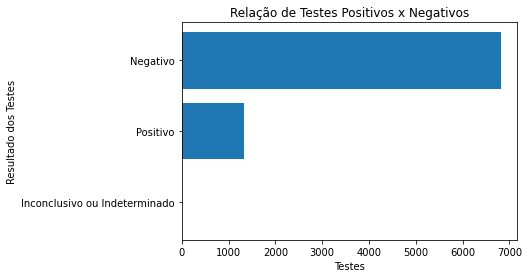

In [ ]:
casos = df_alegrete['resultadoTeste'].value_counts()
casos.sort_values(ascending = True, inplace = True)
#casos = casos.drop(labels='undefined')

plt.xlabel('Testes')
plt.ylabel('Resultado dos Testes')
plt.title('Relação de Testes Positivos x Negativos')
plt.barh(casos.index, casos.values)



---



Text(0.5, 1.0, 'Evolução dos Casos em Alegrete')

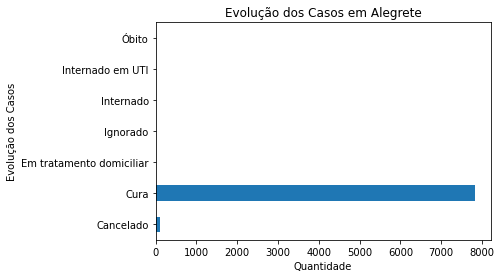

In [ ]:
df_alegrete['evolucaoCaso'].value_counts().sort_index().plot.barh()
plt.xlabel('Quantidade')
plt.ylabel('Evolução dos Casos')
plt.title('Evolução dos Casos em Alegrete')




---



> Este gráfico apresenta uma inconsistência, visto que não apresenta o número de óbitos. A hipótese é que, ao constatar um óbito, não há, por parte dos resposáveis, nenhum movimento ou intenção de reeditar os dados para declaração dessa informação. 



---



### **Questão 2: Casos Positivos/Negativos - Mês**

Qual o mês com o maior número casos ?


Text(0.05, 0.05, '')

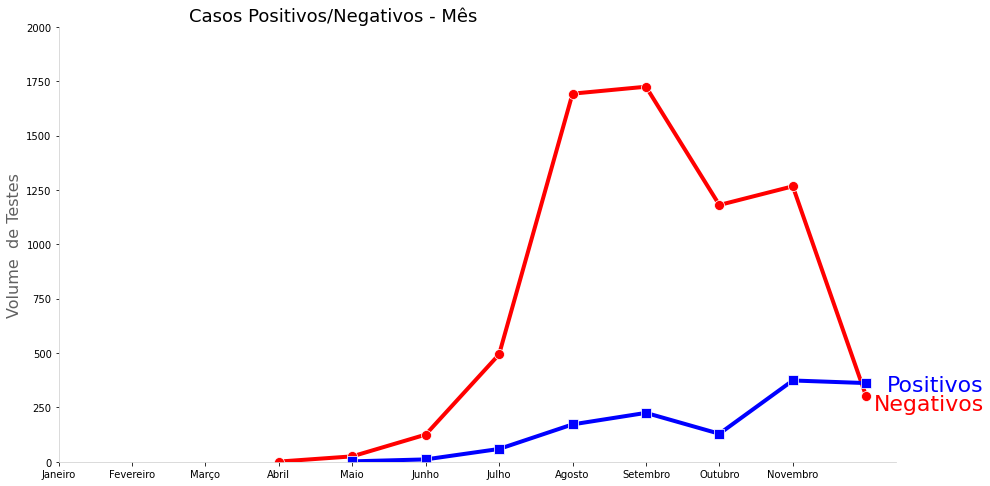

In [ ]:
pos = df_alegrete[(df_alegrete.resultadoTeste == 'Positivo')].dataNotificacao.dt.month.value_counts()
pos.sort_values(ascending = False, inplace = True)
#pos
neg = df_alegrete[(df_alegrete.resultadoTeste == 'Negativo')].dataNotificacao.dt.month.value_counts()
neg.sort_values(ascending = False, inplace = True)
#neg

%matplotlib inline
meses= ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro']

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
# Variables that define subsets of the data, which will be drawn on separate facets in the grid.
sns.lineplot(x=neg.index,y=neg, data=neg,marker='o', markersize=10,lw=4,color='red',ax=ax)
sns.lineplot(x=pos.index,y=pos, data=pos,marker='s', markersize=10,lw=4,color='blue',ax=ax)
plt.title('Casos Positivos/Negativos - Mês',fontsize=18,ha='right',color='black')
sns.despine()
# Change the colors of the left and bottom borders (fade into the background)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
ax.text(12.6, 310, 'Negativos', ha='right', va='top', fontsize=22,color='red')
ax.text(12.6, 400, 'Positivos', ha='right', va='top', fontsize=22,color='blue')
plt.ylabel('')
plt.ylim(0,2000)
ax.set(xticks=range(0, 11), xticklabels=list(meses))
plt.ylabel('Volume  de Testes',fontsize=16,color='#616161')
fig.text(
        0.05, 0.05,
        '',
        ha='left',fontsize=12)



---



Desse gráfico, pode-se levantar algumas hipóteses comportamentais:


*    Em Julho, a população parece se assustar com a pandemia, vê um aumento no número de casos positivos e um aumento significativo do número de testagens, demonstrado pela quantia de casos negativados. Esse comportamento se mantém até setembro. 

*   Em Outubro, parece ter havido uma queda acentuada no número de testagens, visto que tanto o número de positivos quanto de negativos cairam, talvez devido a queda na preocupação das pessoas.

*   O Resultado disso é claramente visto em Novembro, onde há um aumento do número de positivos, resultado talvez do relaxamento anterior. Há também um aumento no número de testes. 

*   Novembro ainda está em aberto, porém vê-se que o número de positivos permaneceu relativamente constante, enquanto o negativo caiu muito, o que significa que poucos foram testados porém quase todos estavam com a doença. Isso possivelmente indica um aumento da pandemia, e agravamento da situação. 








---





> Como o objetivo deste trabalho é analisar os casos de COVID-19 confirmados em Alegrete, optamos por eliminar os casos negativos. Com a diminuição do volume de linhas, será possível melhorar a análise.


> **Agora o dataset de Alegrete é formado por 1526 linhas.**









In [153]:
df_alegrete_positivos = df_alegrete[ df_alegrete['resultadoTeste'] == 'Negativo' ].index  
df_alegrete.drop(df_alegrete_positivos, inplace = True) 
#df_alegrete 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### **Questão 3: Quantidade de Casos Confirmados por Genêro**

Qual a porcentagem de casos de acordo com o genêro?




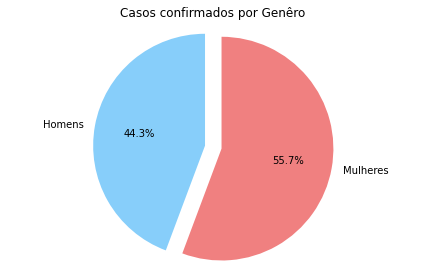

In [ ]:
homens = (df_alegrete['sexo'] == 'Masculino').sum()
mulheres = (df_alegrete['sexo'] == 'Feminino').sum()
proportions = [homens, mulheres]
plt.pie(
    proportions, 
    labels = ['Homens', 'Mulheres'],
    shadow = False,
    colors = ['lightskyblue','lightcoral'],
    explode = (0.15 , 0),
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.axis('equal')
plt.title("Casos confirmados por Genêro")
plt.tight_layout()
plt.show()




---



> As mulheres são as mais infectadas pelo vírus, ficando com um percentual de 55.7%.



---



### **Questão 4: Quantidade de Casos Confirmados por Faixa Etária**

Qual o total de confirmações por faixa etária?

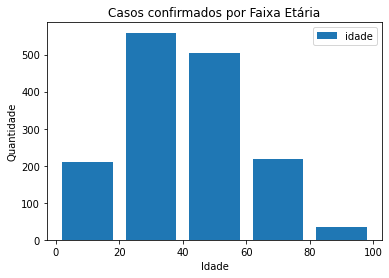

In [ ]:
df_alegrete[['idade']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.title("Casos confirmados por Faixa Etária")
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.show()



---





> O gráfico demonstra que a faixa etária mais afetada é a de 20 a 40 anos, seguido da de 40 a 60. Talvez porque sejam os mais expostos, devido ao trabalho? Ou por terem menos medo. Pode-se ainda ser apenas por serem em maior número na população. 




---



Qual a frequência(histograma) de idade dos pacientes positivos do sexo feminino e masculino na cidade de Alegrete?


sexo
Feminino    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

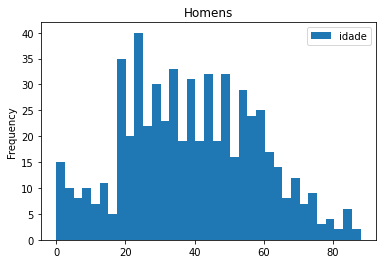

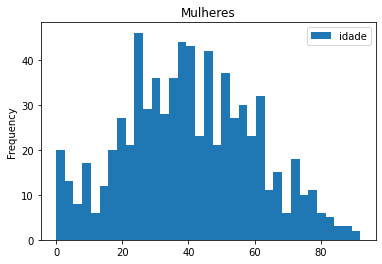

In [ ]:
colSelecionadas = ['sexo', 'resultadoTeste','idade']
positivadoPorSexo = df_alegrete.filter(items=colSelecionadas)
positivadoPorSexo = positivadoPorSexo.dropna()
homens = positivadoPorSexo[(positivadoPorSexo['sexo'] == 'Masculino') & (positivadoPorSexo['resultadoTeste'] == 'Positivo')].groupby('sexo').plot(kind='hist', bins=35, title='Homens')
mulheres = positivadoPorSexo[(positivadoPorSexo['sexo'] == 'Feminino') & (positivadoPorSexo['resultadoTeste'] == 'Positivo')].groupby('sexo').plot(kind='hist', bins=35, title='Mulheres')
homens
mulheres
 



---



### **Questão 5: Quantidade de Casos por Comorbidades**

Qual a quantidade total de confirmação associadas a um ou mais tipos de comorbidades?

Text(0, 0.5, 'Comorbidades')

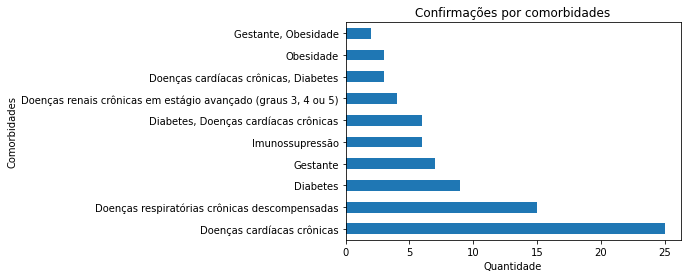

In [ ]:
df_alegrete["condicoes"].value_counts().head(10).plot(kind='barh')
plt.title('Confirmações por comorbidades')
plt.xlabel('Quantidade')
plt.ylabel('Comorbidades')



---



Vê-se no gráfico o acentuado número de pacientes com doenças cardíacas crônicas entre as confirmações. Talvez porque haja um agravamento da covid nessas situações, ou ainda, porque há uma incidência maior da doença na população da cidade, em relação as outras comorbidades. 

### **Questão 6: Quantidade de Casos por Sintomas**

Quais são os principais sintomas dos casos positivos?

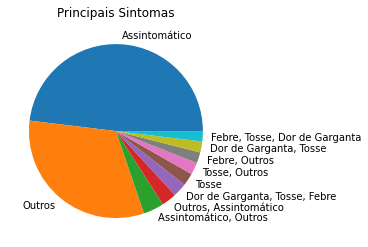

In [ ]:
df_alegrete["sintomas"].value_counts().head(10).plot.pie()
plt.title("Principais Sintomas")
plt.ylabel('')
plt.show()

### **Questão 7: População Geral vs Profissionais da Saúde**

Qual o número de profissionais de saúde que foram infectados?

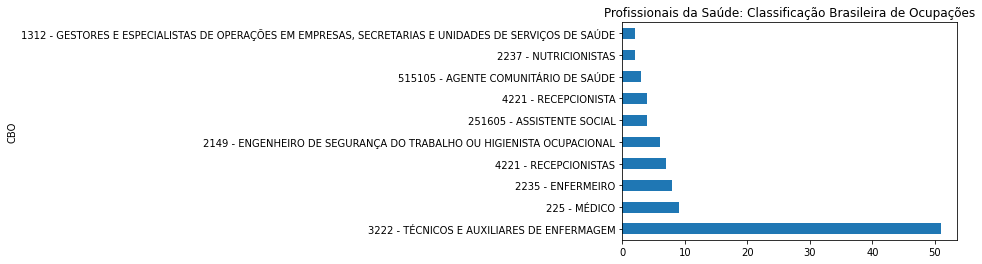

In [ ]:
df_alegrete["cbo"].value_counts().head(10).plot(kind='barh')
plt.title("Profissionais da Saúde: Classificação Brasileira de Ocupações")
plt.ylabel('CBO')
plt.show()

**Comparação de Casos confirmados entre a População em Geral e os Profissionais da Saúde, agrupado por genêro**

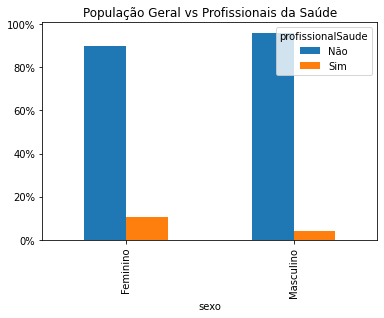

In [ ]:
df_alegrete.groupby(['sexo','profissionalSaude']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=False)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("População Geral vs Profissionais da Saúde")
plt.show()



---



### **Questão 8: Critérios de Confirmação**

Quais são os critérios de confirmação utilizados?

Segundo o **Ministério da Saúde** os casos confirmados de COVID-19 podem ser caracterizados por diferentes critérios.

O código abaixo mostra o total de casos confirmados por tipo de critérios de avaliação utilizados.

<BarContainer object of 5 artists>

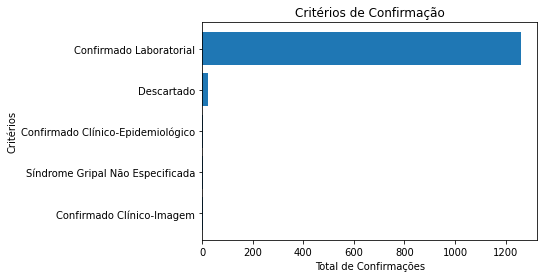

In [ ]:
criterios = df_alegrete.classificacaoFinal.value_counts()
criterios.sort_values(ascending = True, inplace = True)
plt.xlabel('Total de Confirmações')
plt.ylabel('Critérios')
plt.title('Critérios de Confirmação')
plt.barh(criterios.index, criterios.values)